In [4]:
import numpy as np
import scipy
import time
import matplotlib.pyplot as plt

In [5]:
def definir_Matriz(shape, seed=None):
    return np.random.randn(shape[0], shape[1])*2 - 1

#### ejercicio 1
##### intento 1

In [ ]:
"""
def descompLU (A):
    # asumimos que la matriz es cuadrada, entoces A.shape[0] == A.shape[1]
    Ashape0= A.shape[0]

    a11 = A[0,0] # float
    A12 = A[0,1:] #list float
    A21 = A[1:, 0] #list float horizontal
    A22 = A[1:, 1:] # list list float
    u11 = a11
    U12 = A12
    L21 = A21/u11
    L22U22 = A22 - L21.reshape(-1,1)@U12.reshape(1,-1)
    
    if L22U22.shape != (2,2): #paso recursivo
        L22,U22= descompLU(L22U22)
        O = np.zeros(Ashape0 - 1)
        Ot = O.reshape(-1,1)
        L1 = np.concatenate(([1], O))
        print(L21.reshape(-1,1), L22)
        L2 = np.concatenate((L21.reshape(-1, 1), L22), axis=1)
        L  = np.concatenate(([L1],L2))
        U1 = np.concatenate(([u11], U12))
        U2 = np.concatenate((Ot,U22), axis = 1)
        U  = np.concatenate(([U1],U2))
        return L, U
    else: #caso base
        U22 = L22U22
        L   = np.array([[1,0],[L21[0],1]])
        #np.concatenate(np.array([[1,0]]),np.concatenate([L21],np.array([[1]]))) 
        U   = np.array([[u11,U12[0]],[0,U22[0][0]]])
        #np.concatenate(np.concatenate([u11],U12),np.concatenate(np.array([[0]]),U22)) 
        return L,U 

A = np.array([[1, 2, 0, 1], [4, 3, 2, 5], [2, 1, 0, 4], [3, 2, 1, 0]])
L, U = descompLU(A)
print("L:")
print(L)
print("U:")
print(U)
"""

# intento 2

In [6]:
def descompLU(A):
    n = A.shape[0]
    
    #Caso Base/Matriz de 1x1
    if n == 1:
        if A[0, 0] == 0:
            print("Error: La Matriz tiene un 0 en la diagonal.")
            return np.eye(1), A  # Devuelve la matriz identidad y A original
        else:
            return np.array([[1]]), A  # Matriz L es 1x1 con valor 1 y U es A original

    #Definiciones de bloques
         
    a11 = A[0, 0] # Obs: Python guarda este valor como un float  
    A12 = A[0, 1:]
    A21 = A[1:, 0] # Obs: Python guarda este vector en formato horizontal
    A22 = A[1:, 1:]

    #Definiciones de matrices complementarias
    
    I = np.eye(n)  # Matriz identidad de nxn
    I22 = np.eye(n-1) # Matriz identidad menor
    L = I
    U = np.zeros((n, n))  # Matriz de ceros de nxn
    
    
    # Calculos:
    
    # Calculamos u11 y U12
    if a11 == 0:
        print("Error: La Matriz tiene un 0 en la diagonal.")
        return L, A  # Devuelve la matriz identidad y A original
    
    u11 = a11
    U12 = A12
    
    # Calculamos L21
    L21 = A21 / u11
    
    
    # Calculamos L22 y U22 recursivamente
    L22U22 = A22 - L21.reshape(-1,1)@U12.reshape(1,-1)
    L22, U22 = descompLU(L22U22)
    
    if n>2 and np.array_equal(U22, L22U22) and np.array_equal(L22, I22): #n>2 porque si es una matriz de 2x2 el U22 siempre va a ser igual al L22U22 y la L22 a la identidad (1)
        return L, A  # Devuelve la matriz identidad y A original
    
    
    # Actualizamos las matrices L y U
    L[1:, 0] = L21
    U[0, 0] = u11
    U[0, 1:] = U12

    # Actualizamos las matrices L y U con los bloques calculados recursivamente
    L[1:, 1:] = L22
    U[1:, 1:] = U22
    
    return L, U

# Ejemplo de uso:
A = np.array([[1, 2, 0, 1], 
              [4, 3, 2, 5], 
              [2, 1, 0, 4], 
              [3, 2, 1, 0]])

B = np.array([[1, 2, 3],
              [2, 4, 6],
              [3, 6, 9]])

L, U = descompLU(A)

print("L:")
print(L)
print("U:")
print(U)

L:
[[1.  0.  0.  0. ]
 [4.  1.  0.  0. ]
 [2.  0.6 1.  0. ]
 [3.  0.8 0.5 1. ]]
U:
[[ 1.   2.   0.   1. ]
 [ 0.  -5.   2.   1. ]
 [ 0.   0.  -1.2  1.4]
 [ 0.   0.   0.  -4.5]]


# Ejercicio 2

In [2]:
#ejercicio 2

def max_abs(f):  # maximo en valor absoluto
    Max = 0
    for i in range(len(f)):
        if abs(f[i]) > Max:
            Max = abs(f[i])
    return Max

def pos_del_max_abs(f): # posicion del maximo en valor absoluto
    Max = 0
    pos = 0
    for i in range(len(f)):
        if abs(f[i]) > Max:
            Max = abs(f[i])
            pos = i
    return pos
            

def descompPLU(A):
    n = A.shape[0]
    
    #Caso Base/Matriz de 1x1
    if n == 1:
        if A[0, 0] == 0:
            print("Error: La Matriz tiene un 0 en el ultimo elemento de la diagonal.")
            return np.eye(1), np.eye(1), A  
            # Printea error, pues el ultimo elemento de la diagonal es un 0 y no hay ningun otro elemento para hacer el pivot
            # Devuelve P como la matriz identidad(dim = 1), L como la matriz identidad (dim = 1) y U como la matriz original A (en este paso de la recursion)
        else:
            return np.eye(1), np.array([[1]]), A  
            # Devuelve P como la matriz identidad(dim = 1), L como la matriz identidad (dim = 1) y U como la matriz original A (en este paso de la recursion)
    
    #Definiciones de bloques
         
    a11 = A[0, 0] # Obs: Python guarda este valor como un float  
    A12 = A[0, 1:]
    A21 = A[1:, 0] # Obs: Python guarda este vector en formato horizontal
    A22 = A[1:, 1:]

    #Definiciones de matrices complementarias
    
    P = np.eye(n)  # Matriz identidad de nxn
    P22 = np.eye(n-1) # Matriz identidad menor
    L = P
    U = np.zeros((n, n))  # Matriz de ceros de nxn
    
    
    # Calculos:
    
    # Hacemos el Pivot (de ser necesario)
    if a11 == 0:
        if max_abs(abs(A21))!=0: # si ninguna fila tiene un elemento distinto de cero con el cual hacer pivot
            
            k = pos_del_max_abs(A21)+1 # Tomamos la posicion del elemento con mayor valor absoluto en la primer fila de A
            # el +1 es porque se agrega la posicion que ocupa a11
        
            # Intercambiamos las filas en A
            fila_A_k = A[k,0:] # guarda la fila A_K
            A[k, 0:] = A[0, 0:] # paso la fila A_0 a la fila A_k
            A[0, 0:] = fila_A_k #paso la fila A_k a la fila A_0

            # Intercambiamos las filas en P (cabe recalcar que en este paso del algoritmo da igual intercambiar filas o intercambiar columnas)
            fila_P_k = P[k,0:] # guarda la fila P_K
            P[k, 0:] = P[0, 0:] # paso la fila P_0 a la fila P_k
            P[0, 0:] = fila_P_k #paso la fila P_k a la fila P_0
        else:
            print("Error: La Matriz tiene una columna en la cual no se puede hacer pivot.")
    # Calculamos u11 y U12
    u11 = a11
    U12 = A12
    
    # Calculamos L21
    L21 = A21 / u11
    
    # LLEGUÉ HASTA ACÁ, MAS O MENOS, TERMINAR
    
    # Calculamos L22 y U22 recursivamente
    L22U22 = A22 - L21.reshape(-1,1)@U12.reshape(1,-1)
    P22, L22, U22 = descompLU(L22U22)
    
    #print("L22:")
    #print(L22)
    #print("U22:")
    #print(U22)
    #print("L22U22:")
    #print(L22U22)
    
    if n>2 and np.array_equal(U22, L22U22) and np.array_equal(L22, I22):
        return P, L, A  # Devuelve la matriz identidad y A original
    
    
    # Actualizamos las matrices L y U
    L[1:, 0] = L21
    U[0, 0] = u11
    U[0, 1:] = U12

    # Actualizamos las matrices L y U con los bloques calculados recursivamente
    L[1:, 1:] = L22
    U[1:, 1:] = U22
    
    return L, U

# Ejemplo de uso:
A = np.array([[1, 2, 0, 1], 
              [4, 3, 2, 5], 
              [2, 1, 0, 4], 
              [3, 2, 1, 0]])

B = np.array([[1, 2, 3],
              [2, 4, 6],
              [3, 6, 9]])

L, U = descompLU(A)

print("L:")
print(L)
print("U:")
print(U)
    

NameError: name 'np' is not defined

# Ejercicio3

In [7]:
#ejercicio 3
#resolverLU con Scipy
def resolverLUsp(A, b):
    L, U = descompLU(A)
    
    y = scipy.linalg.solve_triangular(L,b, lower = True)
    x = scipy.linalg.solve_triangular(U, y)
    return x
print(resolverLUsp(A, [1,2,3,4]))

x = resolverLUsp(A, [1,2,3,4])
b= [1,2,3,4]

#resolverLU sin Scipy
#resolver U
def resolverU(U,y): 
    n= U.shape[1]
    X=np.zeros(n)
    
    for i in range(n-1,-1,-1):
        suma = 0
        for j in range(i+1,n):
            suma = suma + U[i,j]*X[j]
                    
        X[i] = (y[i]- suma)/U[i,i]
    return X

#resolver L
def resolverL(L,y):
    
    n= L.shape[1]
    X=np.zeros(n)
    
    for i in range(0,n):
        suma = 0
        for j in range(0,i):
            suma = suma + L[i,j]*X[j]     
               
        X[i] = (y[i]- suma)/L[i,i]
    return X

# resolverLU
def resolverLU(A,b):
    L, U = descompLU(A)

    y = resolverL(L,b)
    x = resolverU(U,y)
    
    return x


[ 2.44444444 -0.55555556 -2.22222222 -0.33333333]


In [10]:
#ejercicio 4
#np.seed
A= np.random.rand(100,100)*2 - 1
b= np.random.rand(100)*2 - 1
x = resolverLU(A, b)

def error_rel_n2(A,x,b):
    res = np.linalg.norm(A @ x.T -b,ord=2)/np.linalg.norm(b,ord=2)
    return res
print(A @ x.T)
print(b)
print(np.log(error_rel_n2(A,x,b)))


 

[-0.95895889  0.57240084  0.28954864  0.59333627 -0.31088358  0.21457924
 -0.52990641  0.04208405 -0.09353708 -0.40828968 -0.69417231  0.60222616
  0.04989294  0.59941094 -0.45934399 -0.98109464 -0.28587578 -0.20028169
  0.66636989 -0.622926   -0.91431316  0.61829379 -0.37666243 -0.47966722
 -0.53720608 -0.46838575  0.7567324   0.40443009  0.34691236  0.78191947
 -0.25029943  0.22953592  0.74546209  0.96257745 -0.99295338 -0.646016
 -0.14273872 -0.75806819 -0.55215561 -0.77146155 -0.37755607 -0.3880197
  0.87498694 -0.79844782 -0.25854039  0.64962879 -0.05444214 -0.79042416
  0.7624528   0.75738818  0.06183676  0.26484127 -0.11107277 -0.49056876
  0.44146305 -0.53935003 -0.04847311 -0.53894106  0.25546983  0.32011624
  0.24483041 -0.48095188  0.83166333  0.35374906 -0.80458853 -0.94137955
  0.64578536 -0.80616809 -0.29203001 -0.20304805 -0.59100103 -0.81791256
 -0.86302285  0.55241798  0.96218822 -0.33125808 -0.05061834  0.06804622
  0.58174334 -0.9084705  -0.56669463 -0.05944357  0.90

# Ejercicio 5

In [9]:
#ejercicio 5
def inversa(A):
    try:
        L, U = descompLU(A)
        In = np.eye(A.shape[0])
        y = scipy.linalg.solve_triangular(L, In, lower = True)
        res = scipy.linalg.solve_triangular(U, y)
        return res
    except scipy.linalg.LinAlgError:
        print('Error: la Matriz es Singula')

A = np.array([[1,2,3],[4,5,6],[7,8,9]])
inversa(A)

Error: La Matriz tiene un 0 en la diagonal.
Error: la Matriz es Singula


In [11]:
# ejercicio 6
A = definir_Matriz((10,10))
Ainv = inversa(A)
np.log(np.linalg.norm(Ainv@A - np.eye(A.shape[0]), ord='fro'))

-30.9789720612389

# ejercicio 7


### parte 1

In [12]:
v1 = np.zeros(200)
tiempo1 = np.zeros(200)

# Buscamos errores relativos para ResolverLU
for n in range(10, 201):
    suma_errores = 0
    start = time.time()
    for i in range(10):
        # Definimos la matriz A, x y b tal que Ax = b
        A = definir_Matriz((n,n))
        x = np.random.randn(n)*2-1
        b = A@x
        
        # Resolvemos el sistema Ax = b y calculamos el error
        x1 = resolverLU(A,b)
        print(np.log(error_rel_n2(A,x1,b)))
        suma_errores += np.log(error_rel_n2(A,x1,b))

    tiempo1[n-1] = time.time() - start
    v1[n-1] = suma_errores

-32.686148966387314
-33.36842000732608
-31.287487643350307
-34.30514981535616
-36.405077818030186
-35.47739868644348
-33.678737833407816
-32.55563321960635
-33.60819124634124
-33.82054679509784
-33.84005852662625
-33.275741438691405
-32.52518266919039
-32.6692199476582
-33.11216152039535
-34.75275948368515
-33.81243639101808
-33.47093950824712
-32.84519066804173
-35.21218237264878
-34.0624536537585
-33.846679739007726
-33.38439865324002
-30.83012902120373
-34.594219115976976
-32.09849187307864
-34.18851507529133
-35.01872917489007
-34.11544930153502
-32.332189637329634
-34.10927176899169
-33.72748685963791
-35.60558445815114
-34.43026990957636
-33.231143060103086
-33.41529596029766
-33.46418895271197
-33.63848834061921
-35.64457513251177
-32.535042470471225
-35.27881450199414
-33.80347902132361
-32.71766751787639
-31.949638201142278
-34.298334469853344
-34.07750486406354
-33.536458426902556
-33.71044610229237
-31.477923402214266
-34.04356780350165
-32.1718262088532
-31.79201934969458
-

### Parte 2

In [13]:
v2 = np.zeros(200)
tiempo2 = np.zeros(200)

# Buscamos errores relativos para Inversa
for n in range(10, 201):
    suma_errores = 0
    start = time.time()
    for i in range(10):
        # Definimos la matriz A, x y b tal que Ax = b
        A = definir_Matriz((n,n))
        x = np.random.randn(n)*2-1
        b = A@x

        # Resolvemos el sistema Ax = b y calculamos el error
        x2 = inversa(A)@b
        suma_errores += np.log(error_rel_n2(A,x2,b))

    v2[n-1] = suma_errores
    tiempo2[n-1] = time.time() - start

### Graficos

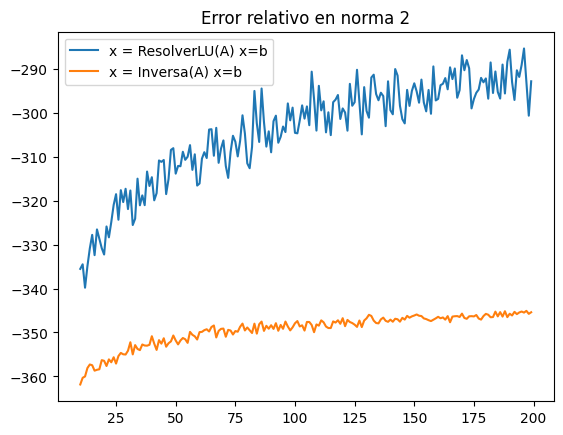

In [17]:
import matplotlib.pyplot as plt
n = np.arange(10, len(v1))
plt.plot(n, v1[10:], label='x = ResolverLU(A) x=b')
plt.plot(n, v2[10:], label='x = Inversa(A) x=b')
plt.title('Error relativo en norma 2')

plt.legend()
plt.show()

#solo se ve la naraja pero es que son exactamente la misma linea

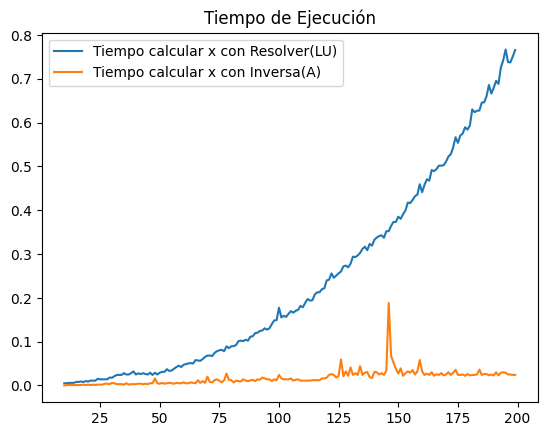

In [18]:
import matplotlib.pyplot as plt
n = np.arange(10, len(v1))
plt.plot(n, tiempo1[10:], label='Tiempo calcular x con Resolver(LU)')
plt.plot(n, tiempo2[10:], label='Tiempo calcular x con Inversa(A)')
plt.title('Tiempo de Ejecución')

plt.legend()
plt.show()

In [41]:
# que pasa si hacemos el ejercicio 7 todo junto?

v1 = np.zeros(200)
v2 = np.zeros(200)
tiempo = np.zeros(200)

# Buscamos errores relativos para ResolverLU
for n in range(10, 201):
    
    suma_errores_res = 0
    suma_errores_inv = 0
    
    start = time.time()
    
    for i in range(10):
        # Definimos la matriz A, x y b tal que Ax = b
        A = definir_Matriz((n,n))
        x = np.random.randn(n)*2-1
        b = A@x

        # Resolvemos el sistema Ax = b y calculamos el error
        x1 = resolverLU(A,b)
        print(np.log(error_rel_n2(A,x1,b)))
        suma_errores_res += np.log(error_rel_n2(A,x1,b))

        x2 = inversa(A)@b
        suma_errores_inv += np.log(error_rel_n2(A,x2,b))
        
    tiempo[n-1] = time.time() - start
    v1[n-1] = suma_errores_res
    v2[n-1] = suma_errores_inv

3.5590094396890617
4.670305331672812
4.583716946737122
4.022473538796733
3.645756002453016
3.3420160474687886
3.2872209202067775
3.9963165102912432
4.639203058911648
4.745635731264754
4.179612224419
4.242055432014105
3.7632852165927217
4.491697896277841
4.387903749694746
4.623209705314334
3.5927517792158037
4.367870943885382
4.616960745753635
4.172650975629732
3.8661754409252787
4.4937155730114
4.9967580038688935
4.38333926006292
4.997600578908233
3.75835353567105
4.453001378892245
4.149711345841485
4.09656037246162
4.396577380348874
5.230304532502319
3.877899131873785
4.6808773733925
3.866984743680456
4.832422135878437
3.4861022455779636
4.8953529713476485
4.049690531225753
4.051150735690756
4.6264749651188986
4.700800922198841
4.456172027228257
4.417480766063934
4.7206200004518175
4.699695320986621
5.268124781880362
4.58957810451496
5.153899993018728
5.163445895251649
4.900561692890938
5.153230518344421
5.573771787144702
4.496768926135919
4.773922271474466
4.824933525220373
3.8424576

KeyboardInterrupt: 

In [16]:
# y si lo hacemos con el solve de numpy?
v2 = np.zeros(200)
tiempo2 = np.zeros(200)

# Buscamos errores relativos para Inversa
for n in range(10, 201):
    suma_errores = 0
    start = time.time()
    for i in range(10):
        # Definimos la matriz A, x y b tal que Ax = b
        A = definir_Matriz((n,n))
        x = np.random.randn(n)*2-1
        b = A@x

        # Resolvemos el sistema Ax = b y calculamos el error
        x2 = np.linalg.solve(A,b)
        suma_errores += np.log(error_rel_n2(A,x2,b))

    v2[n-1] = suma_errores
    tiempo2[n-1] = time.time() - start